Реализовать минимум 5 регрессоров, сравнить метрики между собой, выбрать лучший для Вашего датасета.

In [1]:
# main.py
import pandas as pd
import numpy as np
import kagglehub
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import mdl_preprocessing as preproc
import mdl_analysis as analysis
import mdl_outliers as outliers
import mdl_visualization as visual
import mdl_regressor as regress
import csv

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-2021")
print(file_path)
sys.path.append(file_path)
path = file_path+'/input_data.csv'

dataset = loader.load_csv_file(path)

/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-2021/versions/1
Данные успешно загружены.


In [2]:
!pip install matplotlib

In [3]:
analysis.statistic_data(dataset)

First 5 records:          date     price  level  levels  rooms  area  kitchen_area    geo_lat  \
0  2021-01-01   2451300     15      31      1  30.3           0.0  56.780112   
1  2021-01-01   1450000      5       5      1  33.0           6.0  44.608154   
2  2021-01-01  10700000      4      13      3  85.0          12.0  55.540060   
3  2021-01-01   3100000      3       5      3  82.0           9.0  44.608154   
4  2021-01-01   2500000      2       3      1  30.0           9.0  44.738685   

     geo_lon  building_type  object_type  postal_code  street_id  id_region  \
0  60.699355              0            2     620000.0        NaN         66   
1  40.138381              0            0     385000.0        NaN          1   
2  37.725112              3            0     142701.0   242543.0         50   
3  40.138381              0            0     385000.0        NaN          1   
4  37.713668              3            2     353960.0   439378.0         23   

    house_id  
0  1632918.0

In [4]:
analysis.analysis_data(dataset)

price <= 0 : 8100
% price <= 0 : 0.07131%
level <= 0 : 1467
% level <= 0 : 0.01292%
levels <= 0 : 2152
% levels <= 0 : 0.01895%
rooms <= 0 : 838919
% rooms <= 0 : 7.38605%
kitchen_area <= 0 : 4008174
% kitchen_area <= 0 : 35.28897%


In [3]:
dataset = preproc.preprocessing_data(dataset)

Всего: 9014787
                                date         price         level  \
count                        9014787  9.014787e+06  9.014787e+06   
mean   2021-07-07 05:35:29.576705536  4.352137e+06  6.409099e+00   
min              2021-01-01 00:00:00  1.600001e+06  1.000000e+00   
25%              2021-04-08 00:00:00  2.800000e+06  3.000000e+00   
50%              2021-07-08 00:00:00  3.870000e+06  5.000000e+00   
75%              2021-10-02 00:00:00  5.500000e+06  9.000000e+00   
max              2021-12-31 00:00:00  1.000000e+07  5.000000e+01   
std                              NaN  1.998737e+06  5.074401e+00   

             levels         rooms          area  kitchen_area       geo_lat  \
count  9.014787e+06  9.014787e+06  9.014787e+06  9.014787e+06  9.014787e+06   
mean   1.179602e+01  1.822869e+00  5.035237e+01  1.027032e+01  5.431019e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e-02  4.143758e+01   
25%    5.000000e+00  1.000000e+00  3.670000e+01  8.40000

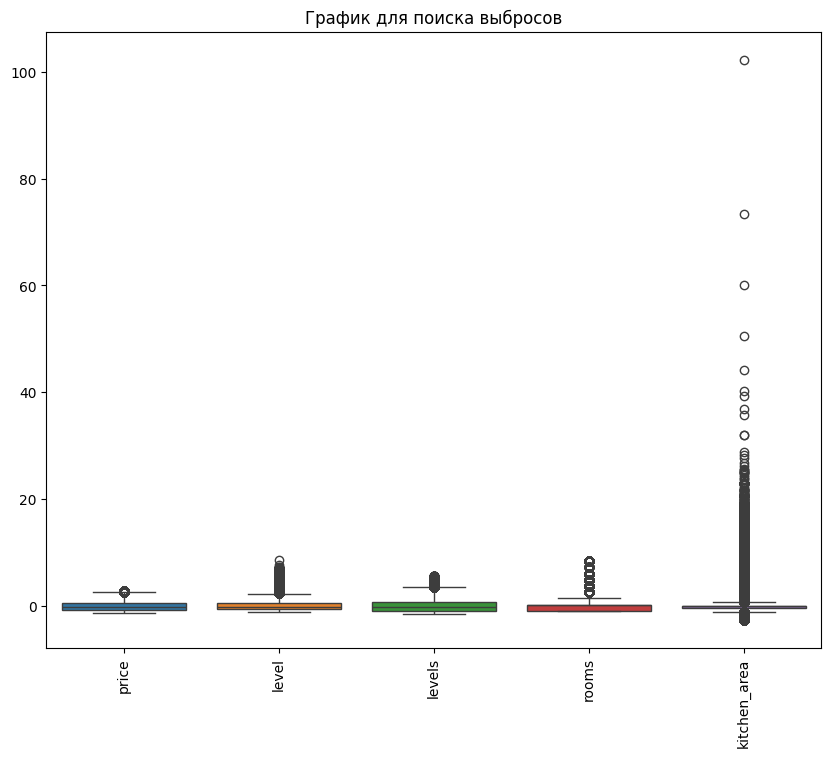

График сохранен: sample_data/outputs/outliers.png


In [6]:
columns_for_outliers = ['price', 'level', 'levels', 'rooms', 'kitchen_area']
visual.visual_outliers_data(dataset, columns_for_outliers)

In [4]:
columns_for_outliers = ['price', 'level', 'levels', 'rooms', 'kitchen_area']
dataset_no_outliers = outliers.outliers_data(dataset, columns_for_outliers)

Всего price выбросов: 512033 
Всего level выбросов: 484869 
Всего levels выбросов: 146044 
Всего rooms выбросов: 278792 
Всего kitchen_area выбросов: 392656 
Всего: 8622131
                                date         price         level  \
count                        8622131  8.622131e+06  8.622131e+06   
mean   2021-07-07 08:21:02.293972992  4.281987e+06  6.367316e+00   
min              2021-01-01 00:00:00  1.600001e+06  1.000000e+00   
25%              2021-04-08 00:00:00  2.750000e+06  3.000000e+00   
50%              2021-07-09 00:00:00  3.800000e+06  5.000000e+00   
75%              2021-10-02 00:00:00  5.400000e+06  9.000000e+00   
max              2021-12-31 00:00:00  1.000000e+07  5.000000e+01   
std                              NaN  1.964738e+06  5.037406e+00   

             levels         rooms          area  kitchen_area       geo_lat  \
count  8.622131e+06  8.622131e+06  8.622131e+06  8.622131e+06  8.622131e+06   
mean   1.169544e+01  1.811093e+00  4.960588e+01  9.76766

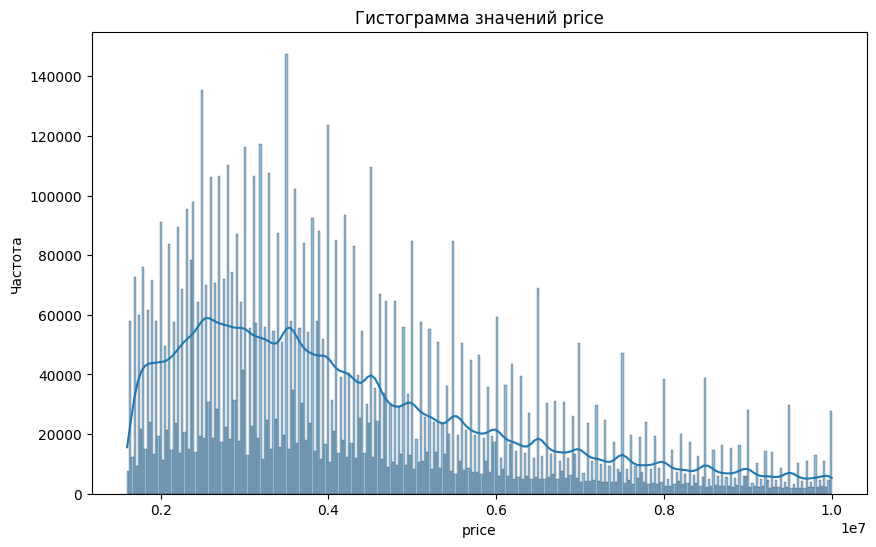

График сохранен: sample_data/outputs/normal_distribution_price.png


In [5]:
visual.visual_hist_target(dataset_no_outliers, 'price')

In [5]:
dataset = preproc.sample_data(dataset_no_outliers, 1000000, 42)

                                date         price           level  \
count                        1000000  1.000000e+06  1000000.000000   
mean   2021-07-07 04:26:07.843200512  4.285026e+06        6.368635   
min              2021-01-01 00:00:00  1.600001e+06        1.000000   
25%              2021-04-08 00:00:00  2.750000e+06        3.000000   
50%              2021-07-08 00:00:00  3.800000e+06        5.000000   
75%              2021-10-02 00:00:00  5.400000e+06        9.000000   
max              2021-12-31 00:00:00  1.000000e+07       42.000000   
std                              NaN  1.965721e+06        5.035653   

               levels           rooms            area    kitchen_area  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean        11.702358        1.813808       49.657083        9.768877   
min          1.000000        1.000000        1.000000        2.500000   
25%          5.000000        1.000000       36.240000        8.200000   
50% 

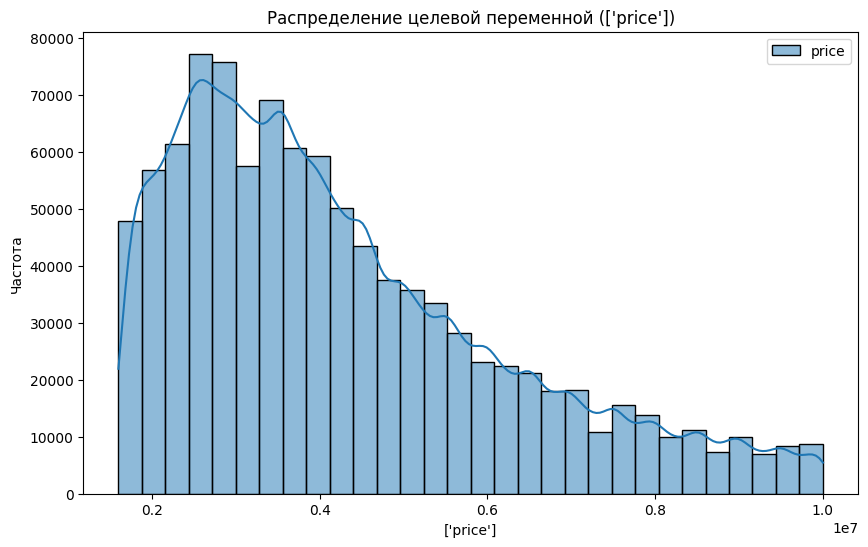

График сохранен: sample_data/outputs/distribution_price.png

Описание целевой переменной:
              price
count  1.000000e+06
mean   4.285026e+06
std    1.965721e+06
min    1.600001e+06
25%    2.750000e+06
50%    3.800000e+06
75%    5.400000e+06
max    1.000000e+07


In [7]:
target = ['price']
visual.visual_target(dataset[target], target)

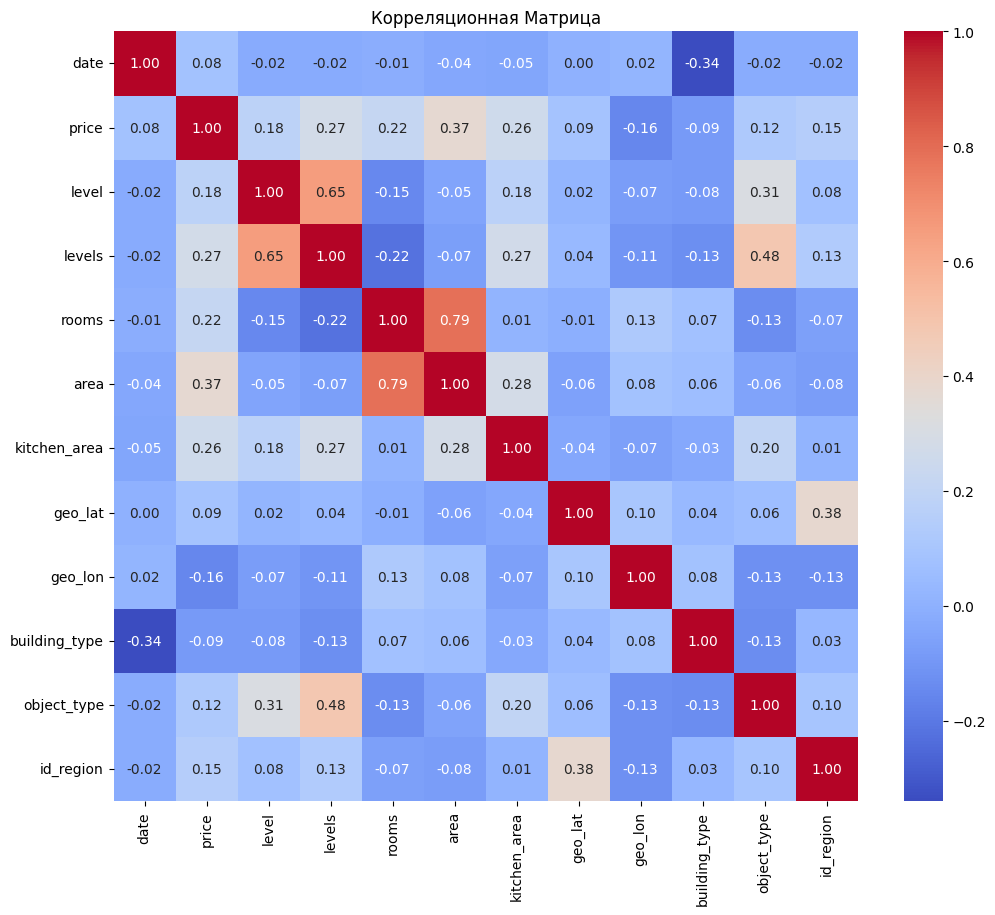

График сохранен: sample_data/outputs/correlation_matrix.png


In [8]:
analysis.corr_data(dataset)

/content/sample_data/mdl_visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs/date_by_price.png


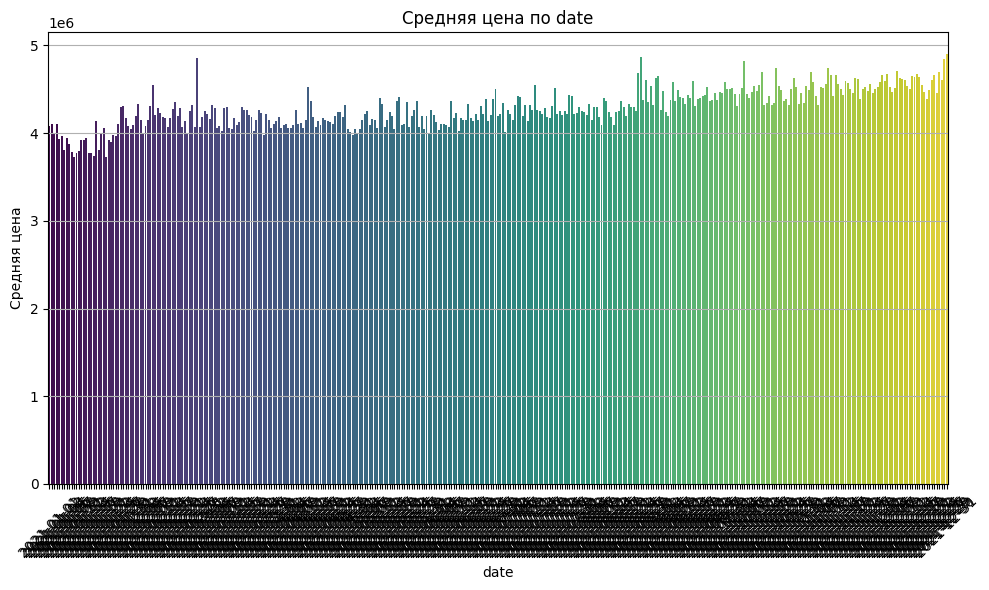

/content/sample_data/mdl_visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs/level_by_price.png


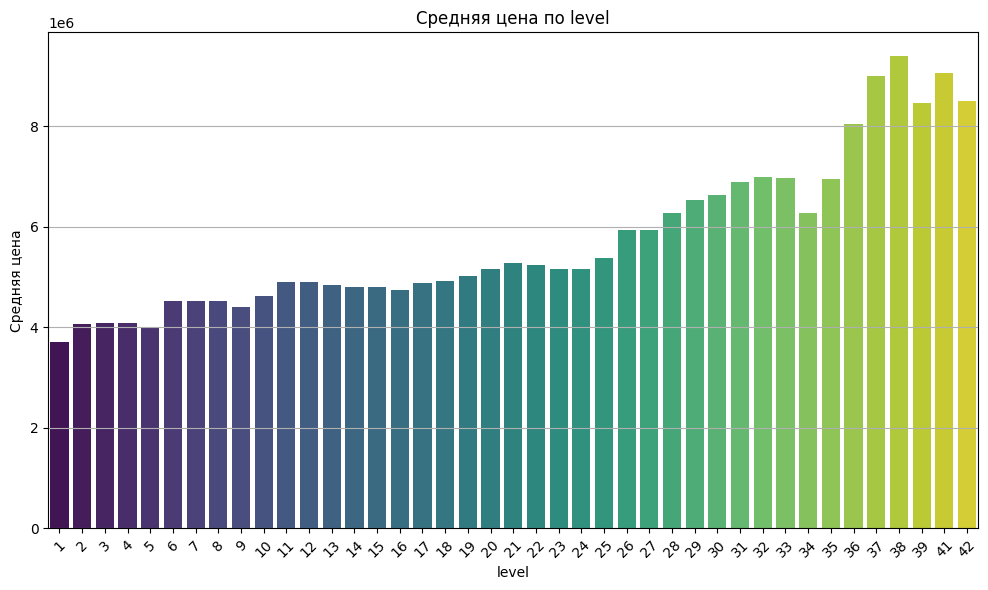

/content/sample_data/mdl_visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs/levels_by_price.png


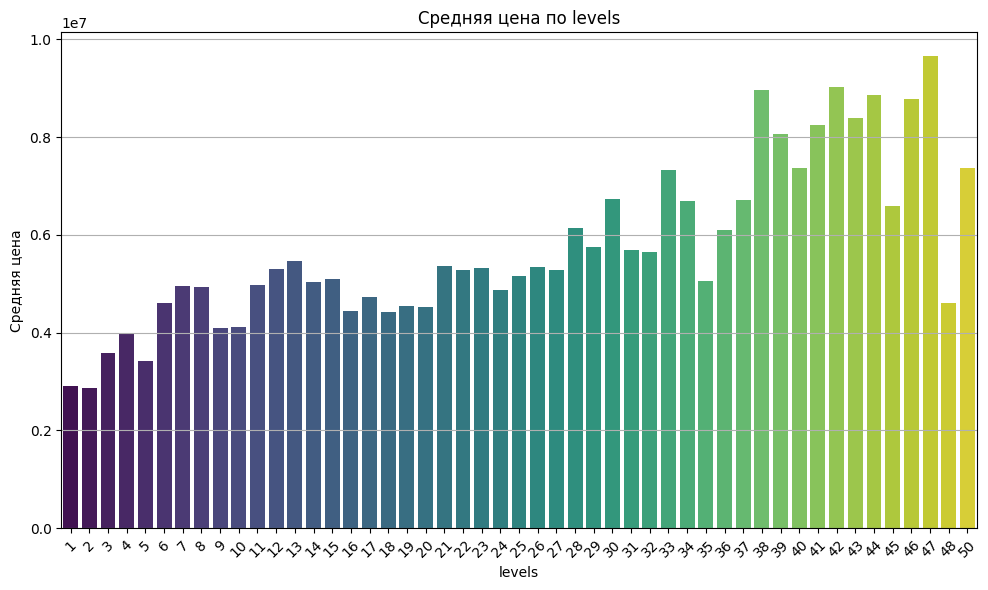

/content/sample_data/mdl_visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs/building_type_by_price.png


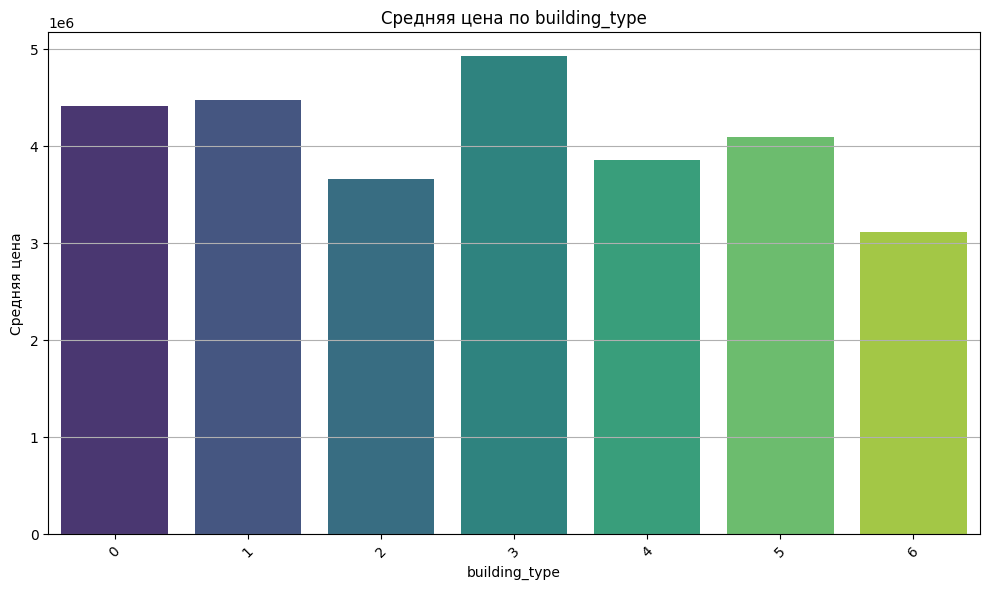

/content/sample_data/mdl_visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs/id_region_by_price.png


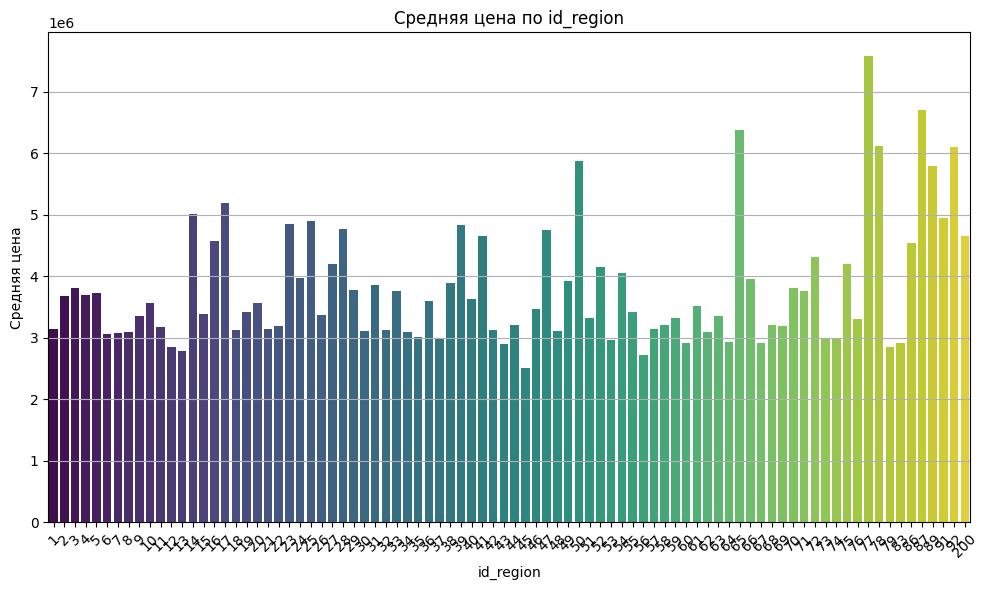

In [8]:
columns_for_by_price = ['date', 'level', 'levels', 'building_type', 'id_region']
for column in columns_for_by_price:
  visual.visual_by_price(dataset, column)

In [6]:
dataset = preproc.transform_date_to_int(dataset, 'date')

Метрики модели: XGBoost
              MAE           MSE       RMSE     R²  Time(s)
XGBoost  786685.0  1.127111e+12  1061655.0  0.708      5.0


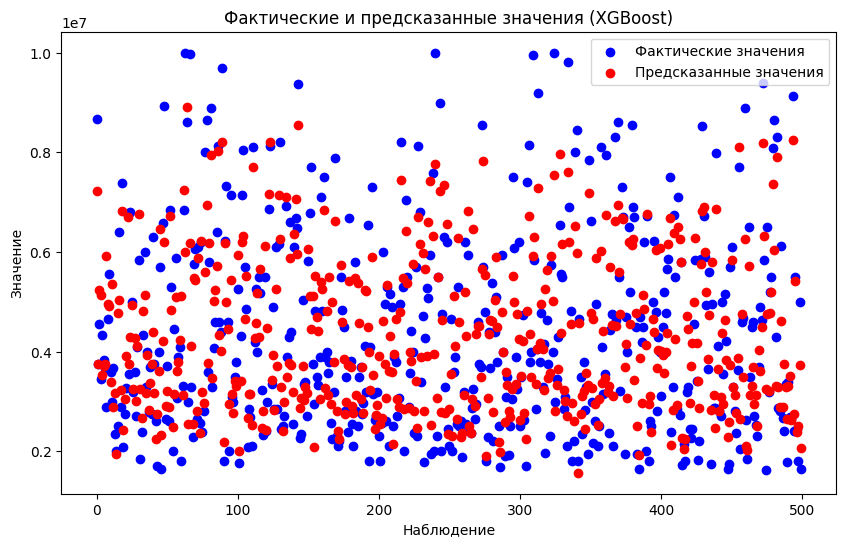

График сохранен: sample_data/outputs/predictions_XGBoost.png
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 11
[LightGBM] [Info] Start training from score 4284510.750880
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

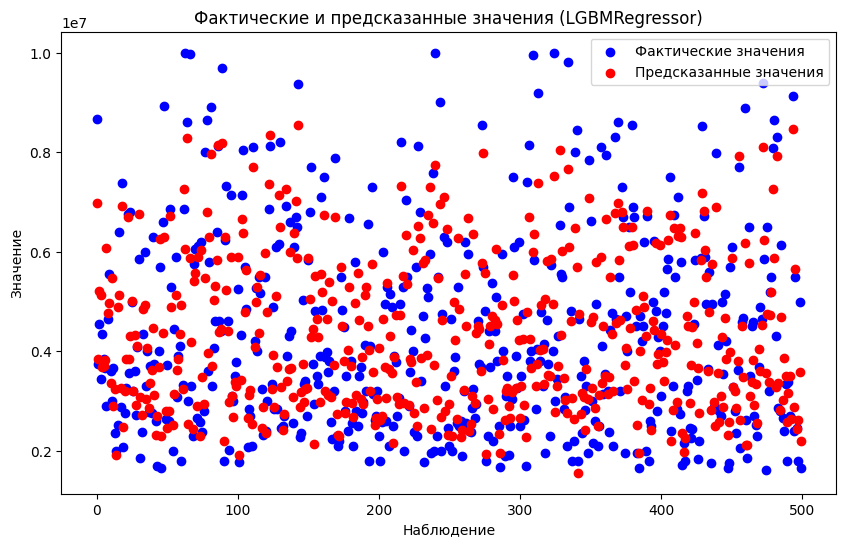

График сохранен: sample_data/outputs/predictions_LGBMRegressor.png
Метрики модели: Gradient Boosting
                        MAE           MSE       RMSE      R²  Time(s)
XGBoost            786685.0  1.127111e+12  1061655.0  0.7080      5.0
LGBMRegressor      795074.0  1.144614e+12  1069866.0  0.7034      5.5
Gradient Boosting  788068.0  1.125919e+12  1061093.0  0.7083    249.3


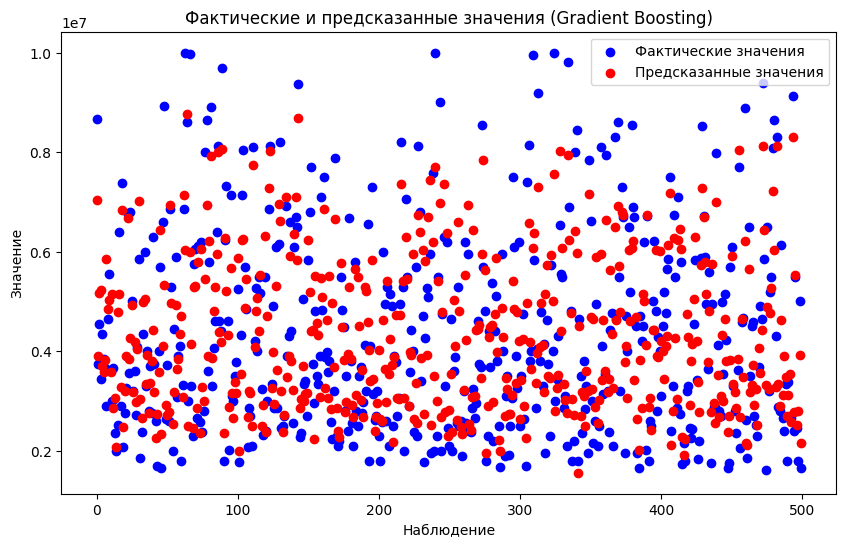

График сохранен: sample_data/outputs/predictions_Gradient Boosting.png
Метрики модели: DecisionTreeRegressor
                            MAE           MSE       RMSE      R²  Time(s)
XGBoost                786685.0  1.127111e+12  1061655.0  0.7080      5.0
LGBMRegressor          795074.0  1.144614e+12  1069866.0  0.7034      5.5
Gradient Boosting      788068.0  1.125919e+12  1061093.0  0.7083    249.3
DecisionTreeRegressor  534780.0  8.205886e+11   905863.0  0.7874     15.0


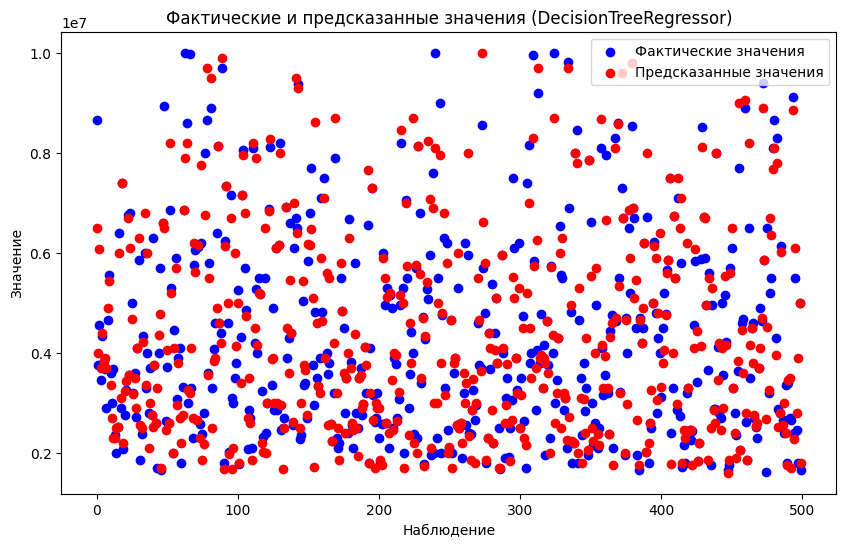

График сохранен: sample_data/outputs/predictions_DecisionTreeRegressor.png
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 11
[LightGBM] [Info] Start training from score 4284510.750880
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

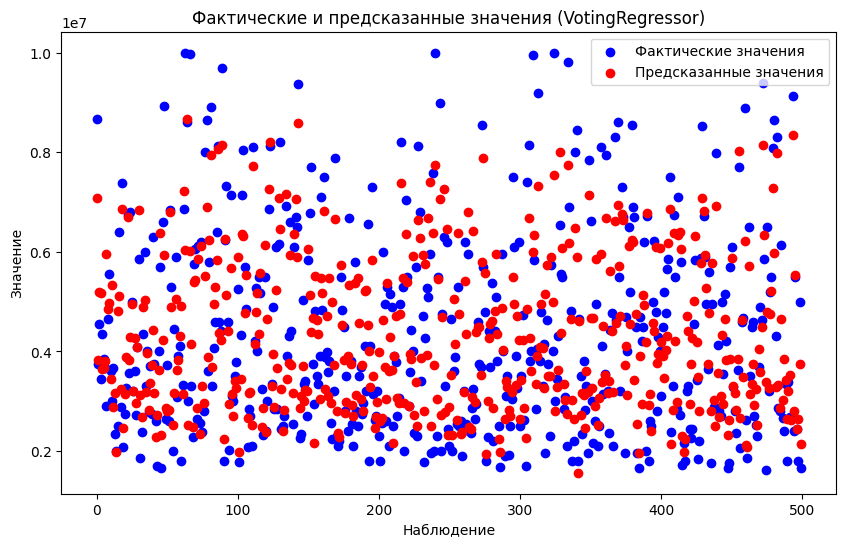

График сохранен: sample_data/outputs/predictions_VotingRegressor.png


In [7]:
metrics = regress.regressor_data(dataset)

Сравнение моделей по метрикам:
                            MAE           MSE       RMSE      R²  Time(s)
XGBoost                786685.0  1.127111e+12  1061655.0  0.7080      5.0
LGBMRegressor          795074.0  1.144614e+12  1069866.0  0.7034      5.5
Gradient Boosting      788068.0  1.125919e+12  1061093.0  0.7083    249.3
DecisionTreeRegressor  534780.0  8.205886e+11   905863.0  0.7874     15.0
VotingRegressor        787902.0  1.127149e+12  1061673.0  0.7080    259.9


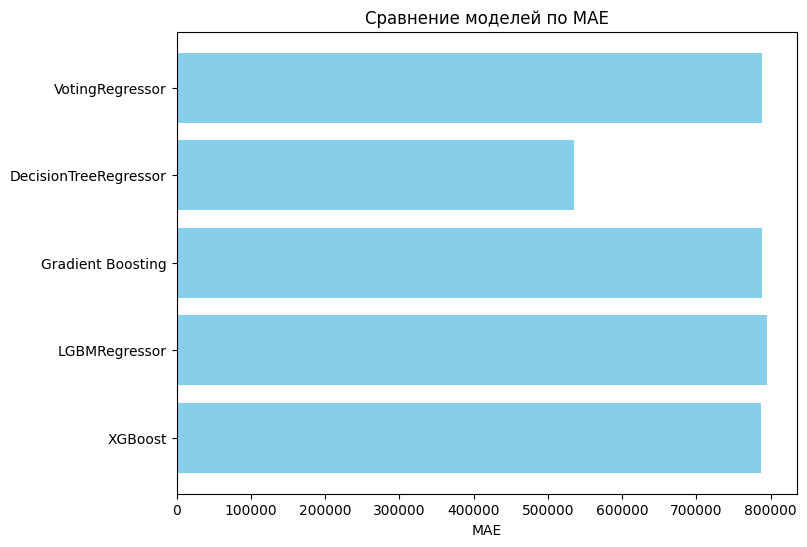

График сохранен: sample_data/outputs/metrics_MAE.png


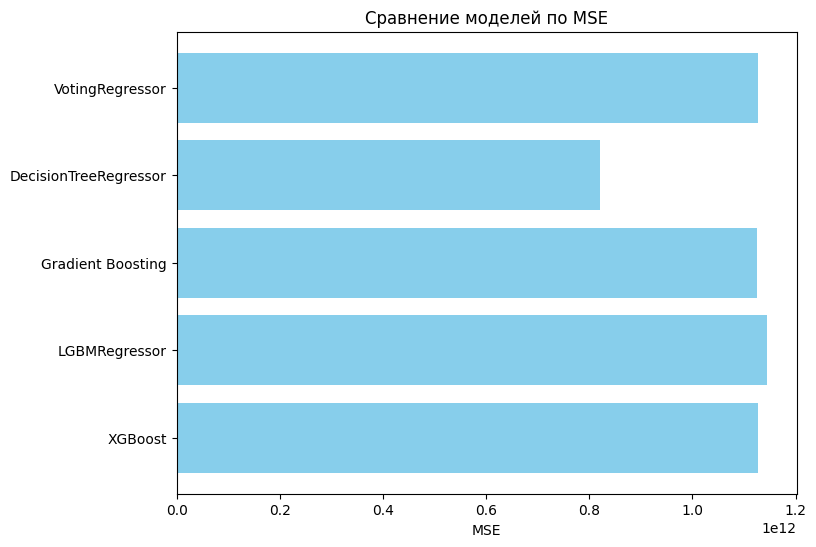

График сохранен: sample_data/outputs/metrics_MSE.png


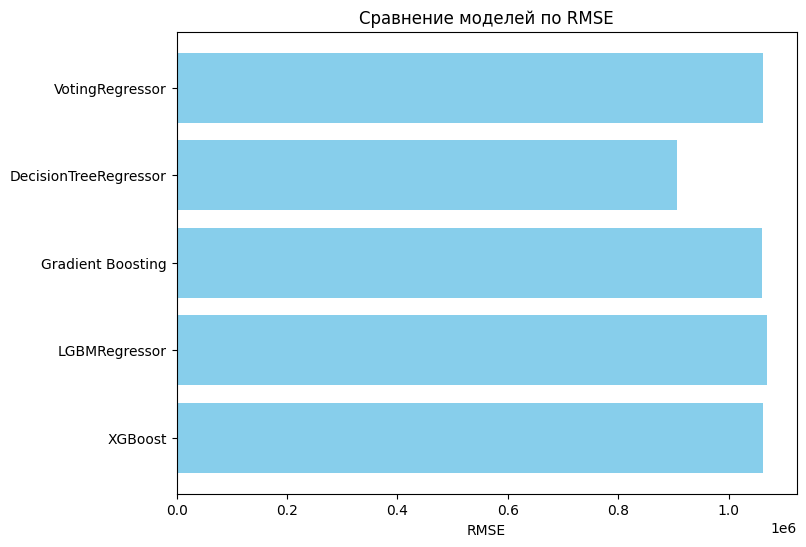

График сохранен: sample_data/outputs/metrics_RMSE.png


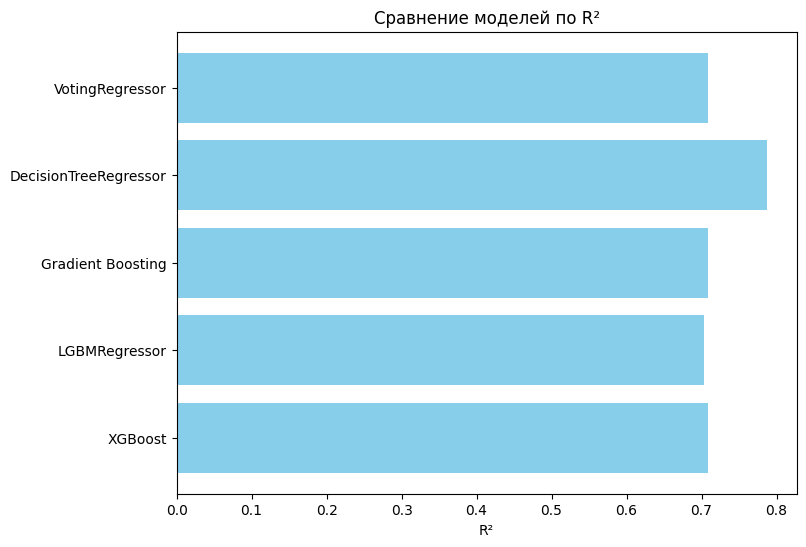

График сохранен: sample_data/outputs/metrics_R².png


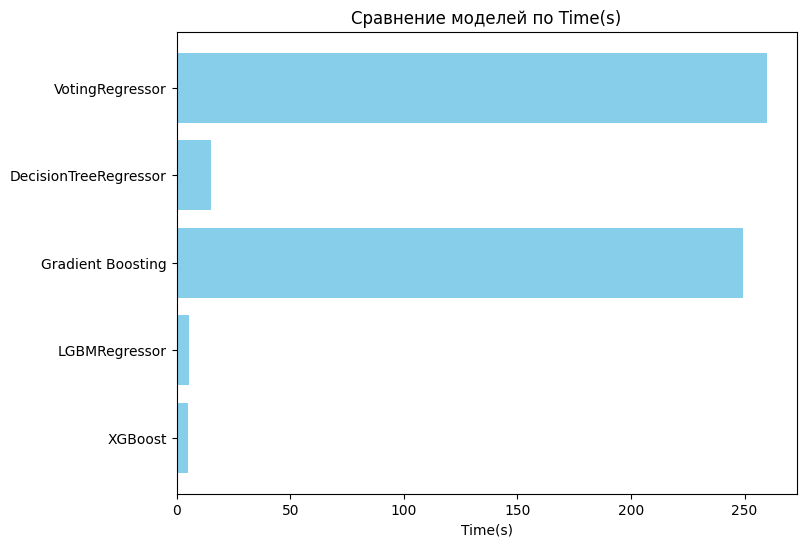

График сохранен: sample_data/outputs/metrics_Time(s).png


In [8]:
visual.visual_metrics(metrics)

In [6]:
# Подбор параметров для DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop('price', axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Определение параметров для подбора
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 15, 20, 25],
    'max_features': [None, 'sqrt', 'log2']
}

# Определение модели
model = DecisionTreeRegressor(random_state=42)

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Лучшие параметры: {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None}
Лучшая точность (CV): -780989204099.0978


*****************
Метрики качества:
*****************
MAE: 535655.1443
MSE: 659808464342.8538
RMSE: 812285.9499
R²: 0.8290


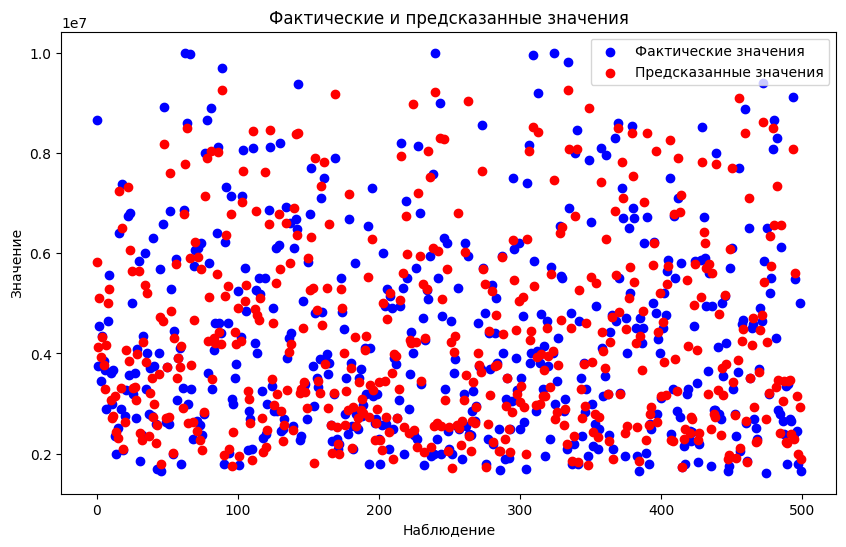

График сохранен: sample_data/outputs/predictions_DecisionTreeRegressor_best.png


In [9]:
# Создание и обучение модели DecisionTreeRegressor с лучшими параметрами
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop('price', axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeRegressor(random_state=42,
                              criterion='friedman_mse',
                              max_depth=20,
                              max_features=None,
                              min_samples_split=15,
                              min_samples_leaf=5) # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Для визуализации берем срез значений
start_index = 5000
end_index = 5500

# Визуализация предсказанных и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(y_test[start_index:end_index])), y_test[start_index:end_index], color='blue', label='Фактические значения')
plt.scatter(range(len(y_test[start_index:end_index])), y_pred[start_index:end_index], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
name_file = f'predictions_DecisionTreeRegressor_best.png'
visual.save_plot(fig, name_file)

*****************
Метрики качества:
*****************
MAE: 422696.5000
MSE: 440845762560.0000
RMSE: 663962.1695
R²: 0.8858


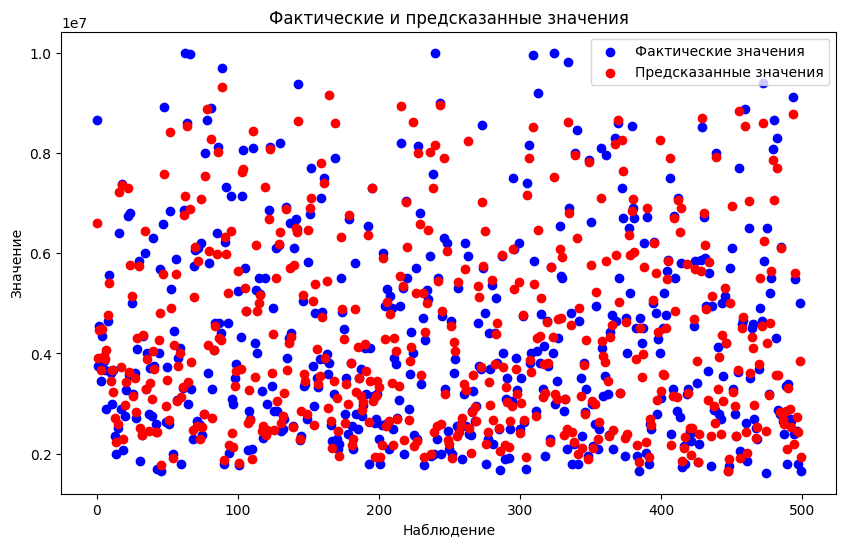

График сохранен: sample_data/outputs/predictions_XGBoost_best.png


In [12]:
# XGBoost с параметрами
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop('price', axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(random_state=42,
                     n_estimators=300,
                     learning_rate=0.1,
                     max_depth=20,
                     min_child_weight=5,
                     objective='reg:squarederror') # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Для визуализации берем срез значений
start_index = 5000
end_index = 5500

# Визуализация предсказанных и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(y_test[start_index:end_index])), y_test[start_index:end_index], color='blue', label='Фактические значения')
plt.scatter(range(len(y_test[start_index:end_index])), y_pred[start_index:end_index], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
name_file = f'predictions_XGBoost_best.png'
visual.save_plot(fig, name_file)